- KEYWORDS: review


## About that ode solution



If you *only* specify tspan, then you do not get much control over where the solution points are.



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

The solution to this ode is $f(x)=x^3 + 6 x^2 −4 x − 24$. There should be three zeros. Now, let's solve the ode and see what we get.



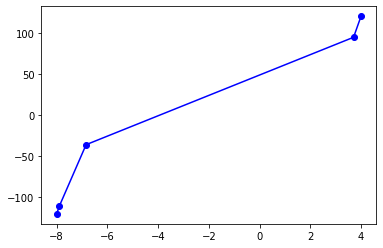

In [3]:
def fprime(x, y):
    return 3 * x**2 + 12 * x - 4


sol = solve_ivp(fprime, (-8, 4), [-120])

plt.plot(sol.t, sol.y.T, "bo-")

But, we *only see one* in this graph. This graph should look "wrong" or incomplete to you. The discontinuities should indicate something is not complete. This problem should be smooth.

With t\_eval, we can see there are three zeros. These are solution values that are stored, but the events are not evaluated at these points.



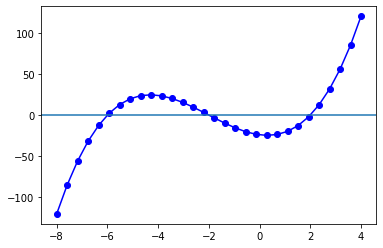

In [7]:
sol = solve_ivp(fprime, (-8, 4), np.array([-120]), t_eval=np.linspace(-8, 4, 30))
plt.plot(sol.t, sol.y.T, "bo-")
plt.axhline(0)

*However* even with t\_eval, we even an event does not find three roots. That is because the event *only sees sign changes from the internal solver*. t\_eval does not influence the events. The problem here is that the solver is able to take a step large enough to skip two of the zeros without losing accuracy.



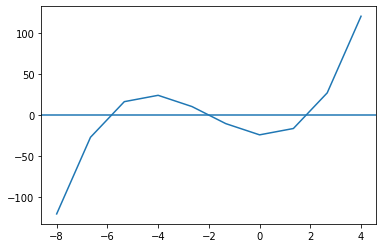

In [12]:
def event(x, y):
    return y[0]


sol = solve_ivp(fprime, (-8, 4), np.array([-120]), t_eval=np.linspace(-8, 4, 10), events=[event])
sol.t_events

plt.plot(sol.t, sol.y.T)
sol.y
plt.axhline(0)

You can fix this by setting the maximum step size. This prevents the solver from taking too large a step. Now, we will find all three solutions.



In [19]:
??solve_ivp

[array([-6., -2.,  2.])]

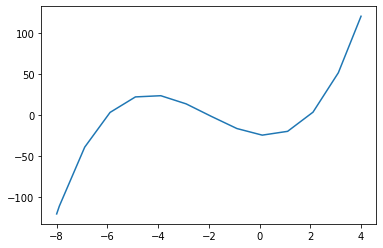

In [20]:
event.direction = 0
sol = solve_ivp(fprime, (-8, 4), np.array([-120]), events=[event], max_step=1.0)
plt.plot(sol.t, sol.y.T)
sol.t_events

How can we verify our solution? A quick, graphical way is to put lines there. These look like they intersect at 0, and qualitatively suggest they are right.



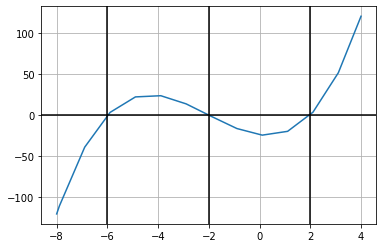

In [24]:
plt.plot(sol.t, sol.y.T)
plt.axhline(0, c="k")
for x in sol.t_events[0]:
    plt.axvline(x, c="k")
plt.grid()

Alternatively, you can plot the dots from the event times, and the value of the solution at that point. But, remember you need to specify `dense_output=True` to make it easy to get the solutions at those points. Later we will see how we can easily interpolate the answers ourselves.



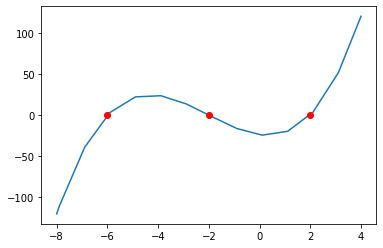

In [26]:
ans = solve_ivp(fprime, (-8, 4), np.array([-120]), events=[event], max_step=1.0, dense_output=True)
plt.plot(ans.t, ans.y.T)
plt.plot(ans.t_events[0], ans.sol(ans.t_events[0]).T, "ro")

  message: 'A termination event occurred.'
     nfev: 68
     njev: 0
      nlu: 0
      sol: None
   status: 1
  success: True
        t: array([-1.00000000e+00, -9.74881135e-01, -8.74881135e-01, -7.74881135e-01,
       -6.74881135e-01, -5.74881135e-01, -4.74881135e-01, -3.74881135e-01,
       -2.74881135e-01, -1.74881135e-01, -7.48811354e-02, -3.46944695e-18])
 t_events: [array([-3.46944695e-18])]
        y: array([[5.00000000e-01, 4.75196614e-01, 3.82708501e-01, 3.00220387e-01,
        2.27732273e-01, 1.65244160e-01, 1.12756046e-01, 7.02679329e-02,
        3.77798193e-02, 1.52917058e-02, 2.80359222e-03, 1.30104261e-17]])

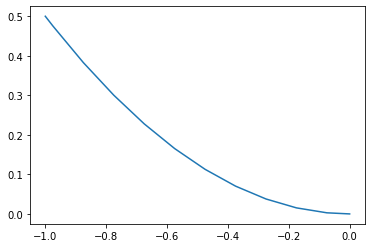

In [39]:
def dydx(x, y):
    return x


def ev(x, y):
    return dydx(x, y)


ev.terminal = True
ans1 = solve_ivp(dydx, t_span=(-1, 1), y0=(0.5,), max_step=0.1, events=ev, rtol=1e-13)

plt.plot(ans1.t, ans1.y.T)
ans1

In [40]:
?np.logspace

Takeaway messages:

1.  It is important to know or at least have a sense of what you expect in the answer.
2.  You also have to be able to test your solution in various ways to make sure the results you get are expected.

